# Training the model

### Importing packages

In [4]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

### Image Data Augmentation

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

### Loading Our Data And Perform Data Augmentation

In [6]:
x_train = train_datagen.flow_from_directory('../Dataset/train', target_size=(64, 64), batch_size=3, color_mode='grayscale', class_mode='categorical')
x_test = test_datagen.flow_from_directory('../Dataset/test', target_size=(64, 64), batch_size=3, color_mode='grayscale', class_mode='categorical')

Found 594 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [7]:
print(x_train.class_indices)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


### Initializing the model

In [8]:
model=Sequential()

### Adding CNN Layers

In [9]:
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [10]:
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
model.add(Flatten())

### Adding Dense Layers

In [12]:
model.add(Dense(units=512, activation='relu'))

In [13]:
model.add(Dense(units=6, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 512)               3

### Configure The Learning Process

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model

In [16]:
model.fit_generator(x_train,steps_per_epoch =594/3,epochs=25,validation_data=x_test,validation_steps=30/3)

Epoch 1/25


C:\Users\Chinna\AppData\Local\Temp\ipykernel_17816\3209820412.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch =594/3,epochs=25,validation_data=x_test,validation_steps=30/3)


198/198 [==============================] - 15s 72ms/step - loss: 1.2383 - accuracy: 0.5051 - val_loss: 0.7380 - val_accuracy: 0.7000
Epoch 2/25
198/198 [==============================] - 9s 45ms/step - loss: 0.5581 - accuracy: 0.7761 - val_loss: 0.3487 - val_accuracy: 0.9333
Epoch 3/25
198/198 [==============================] - 9s 46ms/step - loss: 0.4148 - accuracy: 0.8401 - val_loss: 0.3146 - val_accuracy: 0.9000
Epoch 4/25
198/198 [==============================] - 9s 46ms/step - loss: 0.2808 - accuracy: 0.8855 - val_loss: 0.2973 - val_accuracy: 0.9667
Epoch 5/25
198/198 [==============================] - 9s 46ms/step - loss: 0.1912 - accuracy: 0.9343 - val_loss: 0.2449 - val_accuracy: 0.9000
Epoch 6/25
198/198 [==============================] - 9s 46ms/step - loss: 0.1767 - accuracy: 0.9259 - val_loss: 0.2560 - val_accuracy: 0.8667
Epoch 7/25
198/198 [==============================] - 9s 46ms/step - loss: 0.1070 - accuracy: 0.9579 - val_loss: 0.1382 - val_accuracy: 0.9333
Epoch 8/2

# Save the model

In [17]:
model.save('gesture.h5')

In [18]:
model_json = model.to_json()
with open("model-bw.json", "w") as json_file:
     json_file.write(model_json)

# Test the model

In [19]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model("gesture.h5")

In [20]:
img = image.load_img(r'../Dataset/test/1/1.jpg', grayscale=True, target_size=(64,64))
x = image.img_to_array(img)
x.shape

C:\Users\Chinna\AppData\Roaming\Python\Python39\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


(64, 64, 1)

In [21]:
x = np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 1)

In [22]:
pred_x = model.predict(x)
pred_x=np.argmax(pred_x,axis=1)
pred_x

1/1 [==============================] - 0s 120ms/step


array([1], dtype=int64)

In [23]:
index=['0', '1', '2', '3', '4', '5']
result=str(index[pred_x[0]])
result

'1'

In [24]:
import numpy as np
p=[]
for i in range(0,6):
  for j in range(0,5):
    img = image.load_img(r"../Dataset/test//"+str(i)+"//"+str(j)+".jpg", grayscale=True, target_size=(64,64))
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    pred = np.argmax(model.predict(x),axis=-1)
    p.append(pred)
print(p)

1/1 [==============================] - 0s 19ms/step
[array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([2], dtype=int64), array([2], dtype=int64), array([1], dtype=int64), array([2], dtype=int64), array([2], dtype=int64), array([3], dtype=int64), array([3], dtype=int64), array([3], dtype=int64), array([3], dtype=int64), array([3], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([5], dtype=int64), array([5], dtype=int64), array([5], dtype=int64), array([5], dtype=int64), array([5], dtype=int64)]


In [25]:
result = []
index=['0','1','2','3','4','5']
for i in p:
  result.append(index[i[0]])
print(result)

['0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '2', '2', '1', '2', '2', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '5', '5', '5', '5', '5']


Populating the interactive namespace from numpy and matplotlib


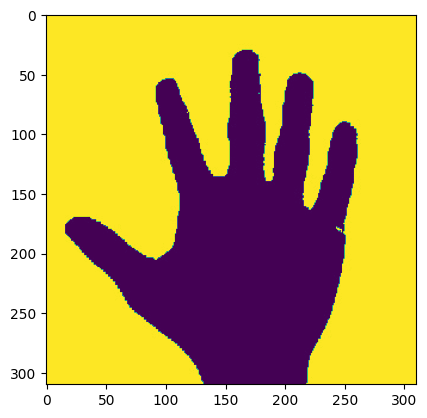

In [26]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = mpimg.imread(r'..\Dataset\test\5\0.jpg')
imgplot = plt.imshow(imgs)
plt.show()

Populating the interactive namespace from numpy and matplotlib


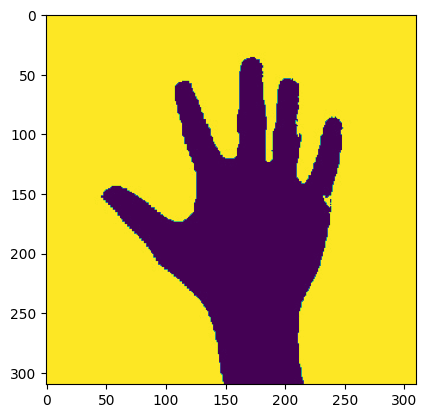

In [27]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = mpimg.imread(r'..\Dataset\test\5\1.jpg')
imgplot = plt.imshow(imgs)
plt.show()

Populating the interactive namespace from numpy and matplotlib


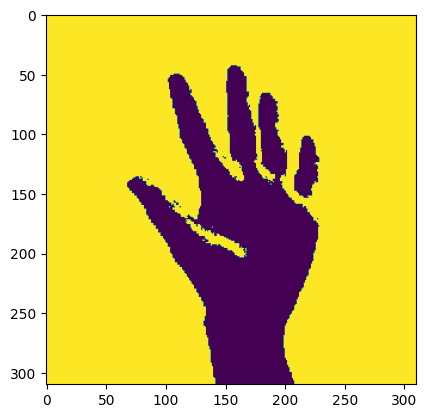

In [28]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = mpimg.imread(r'..\Dataset\test\5\2.jpg')
imgplot = plt.imshow(imgs)
plt.show()

Populating the interactive namespace from numpy and matplotlib


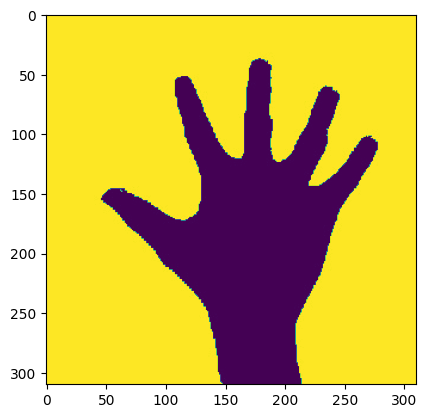

In [29]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = mpimg.imread(r'..\Dataset\test\5\3.jpg')
imgplot = plt.imshow(imgs)
plt.show()

Populating the interactive namespace from numpy and matplotlib


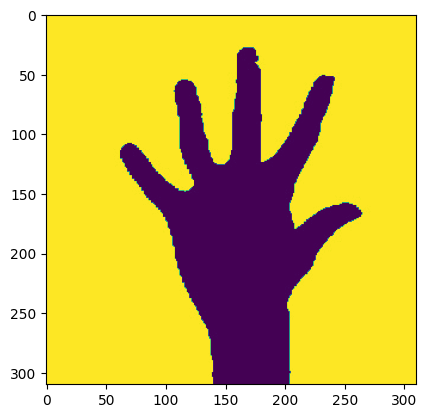

In [31]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = mpimg.imread(r'..\Dataset\test\5\4.jpg')
imgplot = plt.imshow(imgs)
plt.show()